In [1]:
import numpy as np
import pandas as pd
from maad import sound, rois, features
from maad.util import (power2dB, plot2d, format_features, read_audacity_annot,
                       overlay_rois, overlay_centroid)
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [5]:

s, fs = sound.load('audio_data/corvus_audio_file15.wav')

dB_max = 70

Sxx_power, tn, fn, ext = sound.spectrogram(s, fs, nperseg=1024, noverlap=1024//2)

Sxx_db = power2dB(Sxx_power) + dB_max
plot2d(Sxx_db, **{'vmin':0, 'vmax':dB_max, 'extent':ext})

(<AxesSubplot:xlabel='Time [s]', ylabel='Frequency [Hz]'>,
 <Figure size 1452.09x388.9 with 2 Axes>)

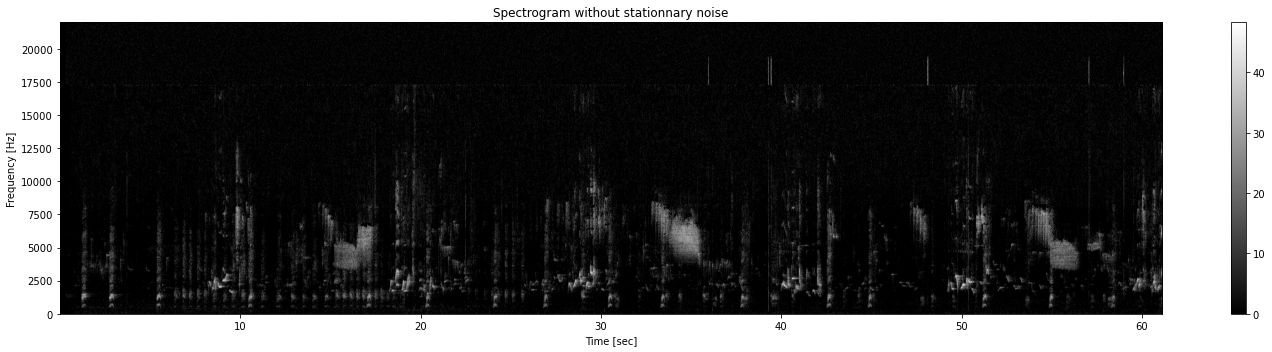

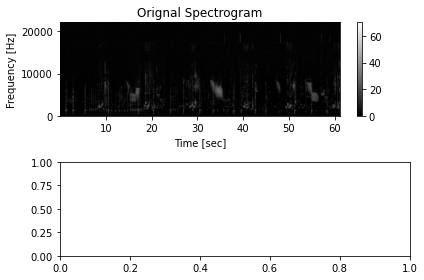

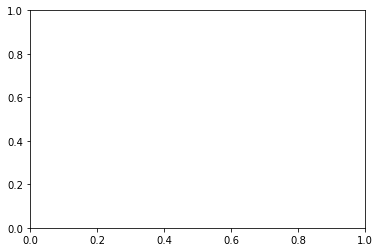

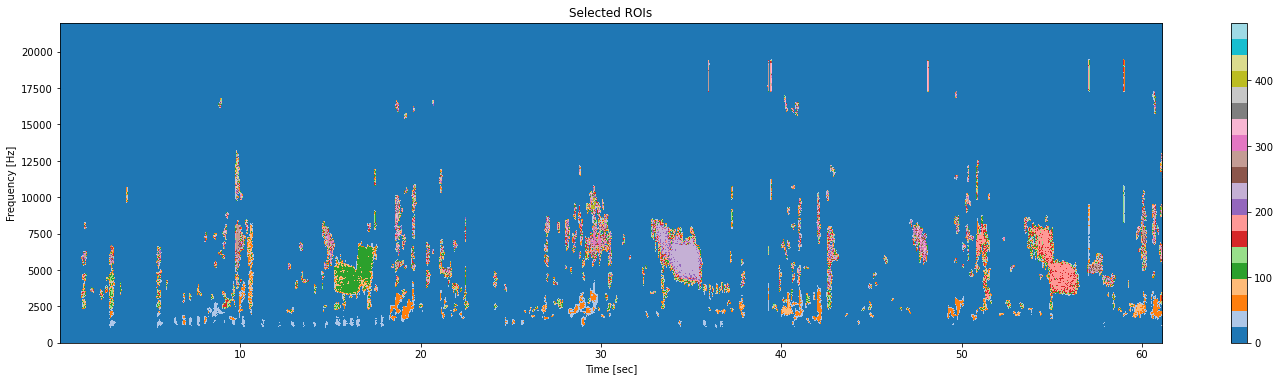

IndexError: index 1326 is out of bounds for axis 0 with size 512

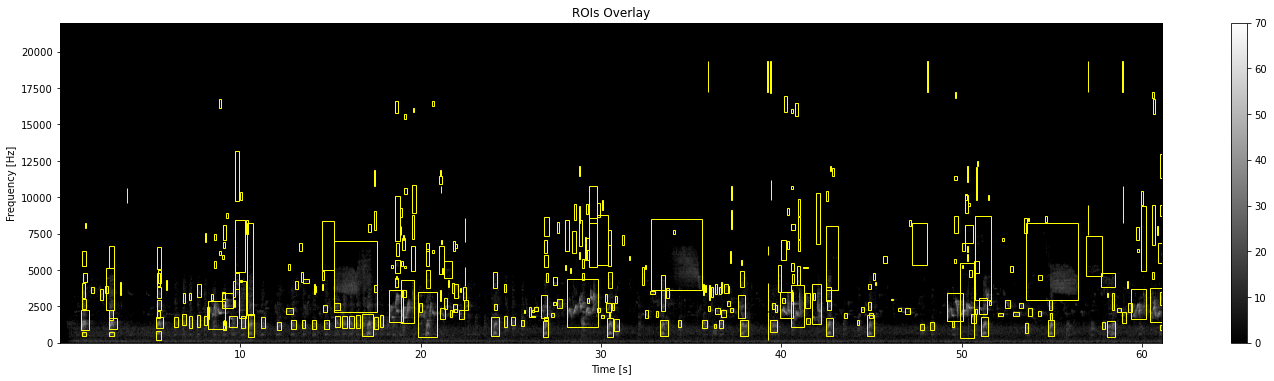

In [7]:
Sxx_power_noNoise= sound.median_equalizer(Sxx_power, display=True, **{'extent':ext})
Sxx_db_noNoise = power2dB(Sxx_power_noNoise)

Sxx_db_noNoise_smooth = sound.smooth(Sxx_db_noNoise, std=0.5,
                         display=True, savefig=None,
                         **{'vmin':0, 'vmax':dB_max, 'extent':ext})

im_mask = rois.create_mask(im=Sxx_db_noNoise_smooth, mode_bin ='relative',
                           bin_std=8, bin_per=0.5,
                           verbose=False, display=False)

im_rois, df_rois = rois.select_rois(im_mask, min_roi=25, max_roi=None,
                                 display= True,
                                 **{'extent':ext})

df_rois = format_features(df_rois, tn, fn)

ax0, fig0 = overlay_rois(Sxx_db, df_rois, **{'vmin':0, 'vmax':dB_max, 'extent':ext})

df_centroid = features.centroid_features(Sxx_db, df_rois, im_rois)

df_centroid = format_features(df_centroid, tn, fn)
pp.pprint(df_centroid)
ax0, fig0 = overlay_centroid(Sxx_db, df_centroid, savefig=None,
                             **{'vmin':0,'vmax':dB_max,'extent':ext,'ms':4,
                                'marker':'+', 'fig':fig0, 'ax':ax0})

In [12]:
df_centroid['area_xy'][0]



123